### Import modules

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from collections import Counter
from general_functions import General

In [2]:
gen = General()

### Read data

In [3]:
cor_sents = gen.read_from_pickle('./Pickles/cor_sents.pickle')
cor_counts = gen.read_from_pickle('./Pickles/cor_counts.pickle')

In [5]:
def create_n_grams(sentences: list, n) -> list:
    """Convert sentences into n-grams
    Parameters:
        sentences (list): a list of tokens in each sentence
        n (int): n-gram order
    Returns:
        list: a list of all n-grams"""
    
    n_grams_list = []
    
    for sentence in sentences:
        n_grams = list(zip(*[sentence[i :] for i in range(n)]))
        n_grams_list.extend(n_grams)
        
    return n_grams_list

In [45]:
df = pd.DataFrame(create_n_grams(cor_sents, 2), columns = ['w1', 'w2'])
df.head()

,w1,w2
0,<s>,we
1,we,slid
2,slid,upon
3,upon,our
4,our,knees


In [46]:
df['bigram'] = df['w1'] + ' ' + df['w2']
df.head()

,w1,w2,bigram
0,<s>,we,<s> we
1,we,slid,we slid
2,slid,upon,slid upon
3,upon,our,upon our
4,our,knees,our knees


In [47]:
df = pd.DataFrame(df.groupby(['bigram']).size()).reset_index().rename(columns = {0: 'count'})
df['w1'] = df['bigram'].apply(lambda x: x.split()[0].strip())
df['w2'] = df['bigram'].apply(lambda x: x.split()[1].strip())

df.head()

,bigram,count,w1,w2
0,000 000,1,000,000
1,000 </s>,3,000,</s>
2,000 at,1,000,at
3,000 atmospheres,1,000,atmospheres
4,000 cubic,1,000,cubic


In [48]:
G = nx.from_pandas_edgelist(df, source = 'w1', target = 'w2', edge_attr = 'count', create_using = nx.DiGraph)
len(G)

11578

In [50]:
# G.in_degree()
G.out_degree('nemo')

159

In [51]:
nx.write_gml(G, './Graphs/corpus_vocab_network.gml')

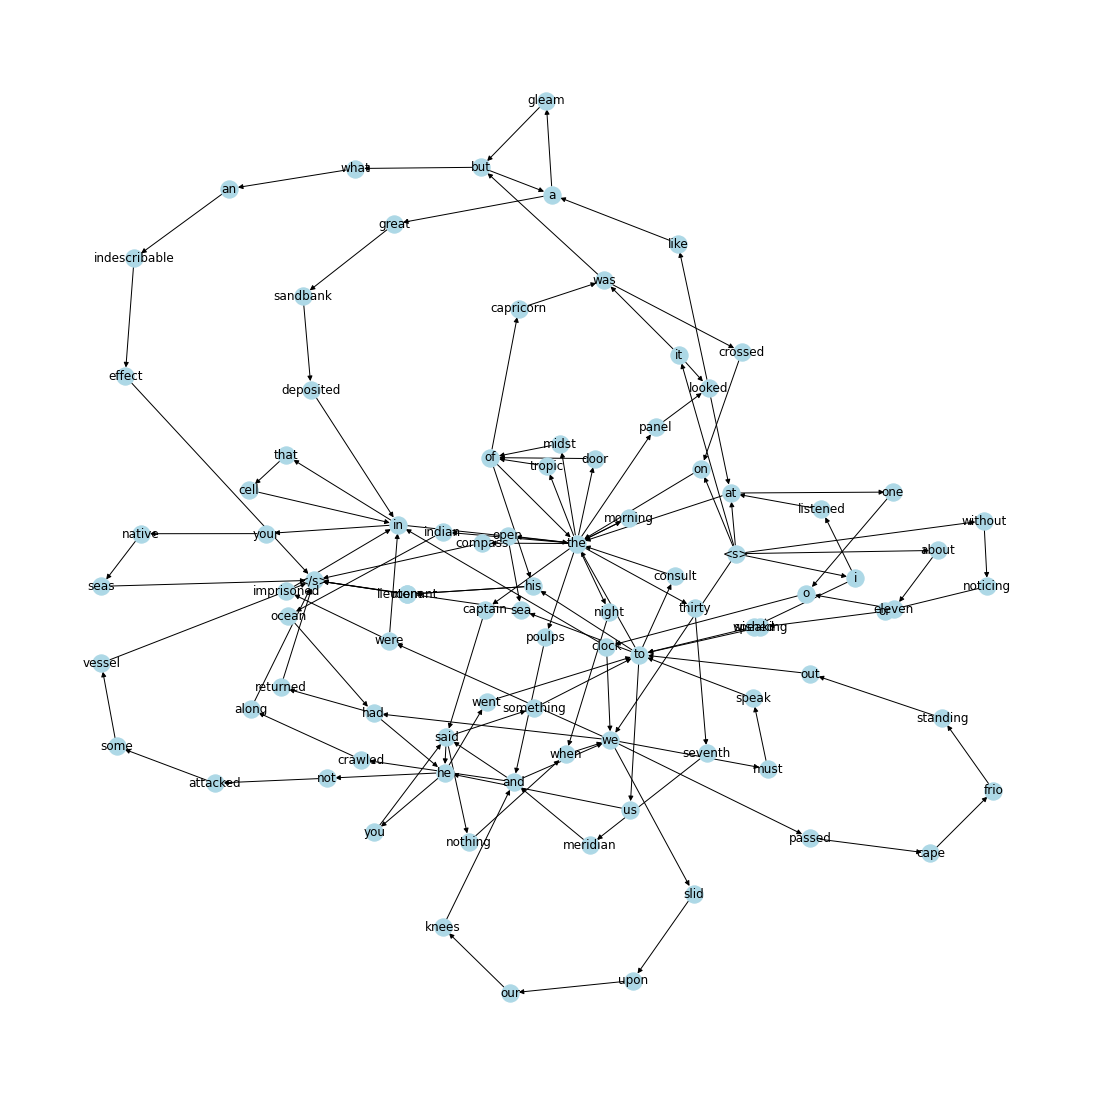

In [42]:
fig = plt.figure(figsize = (15, 15))
nx.draw_kamada_kawai(G, node_color = '#add8e6', with_labels = True)
plt.show()
plt.close()